In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegressione
from sklearn.ensemble import RandomForestRegressor



# Load the dataset
data = pd.read_csv('heart.csv')

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.shape

(918, 12)

In [5]:
# Print DataFrame information
print('### Dataframe information ###', '\n')
df.info()

### Dataframe information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
print('### Total Null Data in DataFrame ###','\n')
df.isnull().sum().sum()

### Total Null Data in DataFrame ### 



0

In [7]:
# Check duplicate data

print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [8]:
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

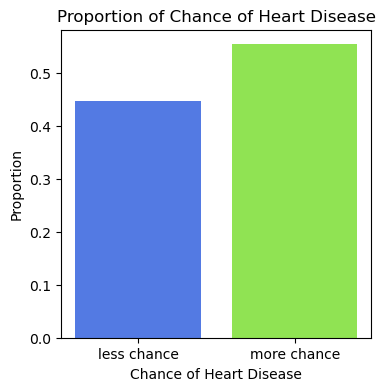

In [10]:
output_counts = df["HeartDisease"].value_counts(normalize=True)
plt.figure(figsize=(4,4))
plt.bar(x=output_counts.index, height=output_counts.values, color=["#90E353", "#537AE3"])
plt.xticks([0, 1], ["less chance", "more chance"])
plt.title("Proportion of Chance of Heart Disease")
plt.xlabel("Chance of Heart Disease")
plt.ylabel("Proportion")
plt.show()

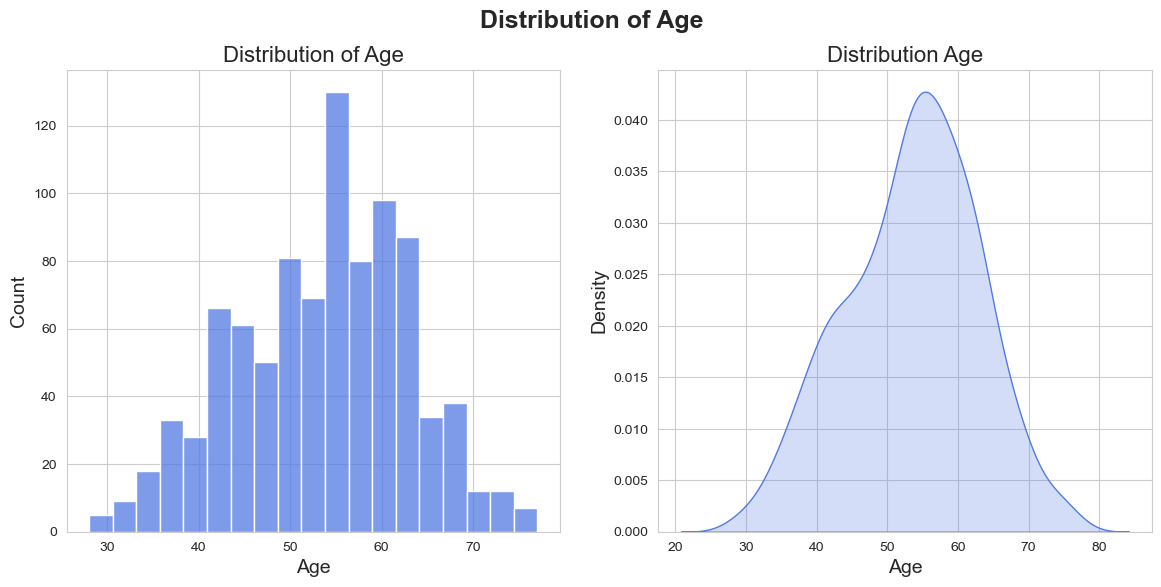

In [11]:
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
sns.histplot(data=df, x='Age', kde=False, ax=ax1, color='#537AE3')
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Distribution of Age', fontsize=16)
sns.kdeplot(data=df, x='Age', fill=True, ax=ax2, color='#537AE3')
ax2.set_xlabel('Age', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('Distribution Age', fontsize=16)
fig.suptitle('Distribution of Age', fontsize=18, fontweight='bold')
plt.show()

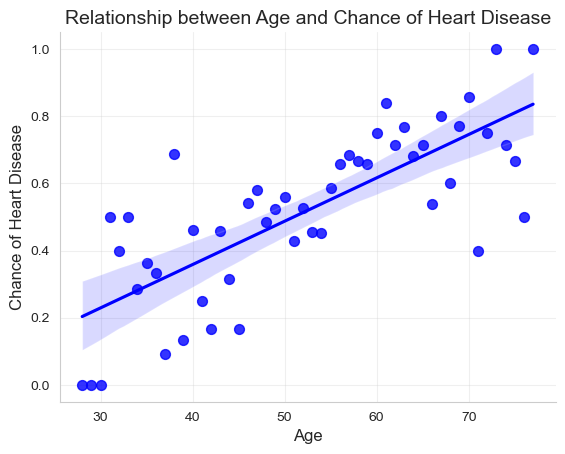

In [12]:
# Relationship between Age and Chance of Heart Disease

age_grouped = df.groupby('Age')['HeartDisease'].mean()
sns.regplot(x=age_grouped.index, y=age_grouped, color='blue', scatter_kws={'s': 50})
sns.despine()
plt.xlabel('Age', fontsize=12)
plt.ylabel('Chance of Heart Disease', fontsize=12)
plt.title('Relationship between Age and Chance of Heart Disease', fontsize=14)
plt.grid(axis='both', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

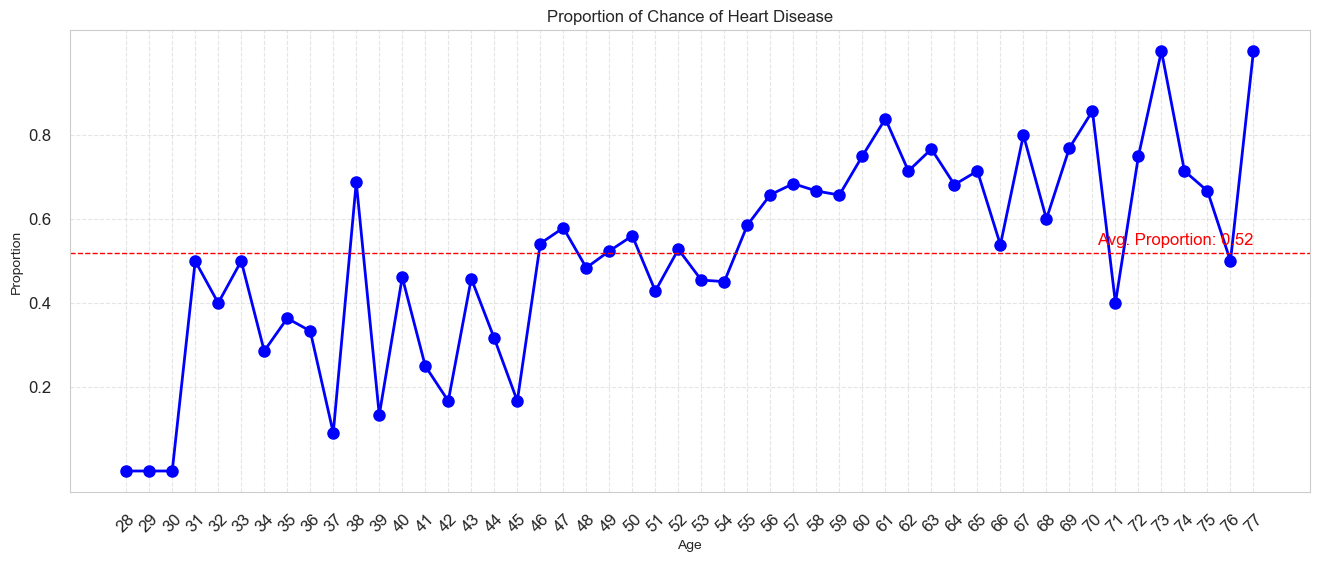

In [13]:
age_prop = df.groupby('Age')['HeartDisease'].mean()
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(age_prop.index, age_prop.values, marker='o', markersize=8, linewidth=2, color='blue')

ax.set_xlabel('Age')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Chance of Heart Disease')
ax.set_xticks(age_prop.index)
ax.tick_params(axis='x', which='major', labelsize=12, pad=10, rotation=45)
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.tick_params(axis='y', which='major', labelsize=12, pad=10)
ax.grid(axis='y', linestyle='--', alpha=0.5)

avg_prop = age_prop.mean()
ax.axhline(avg_prop, linestyle='--', color='red', linewidth=1)
ax.text(age_prop.index[-1], avg_prop+0.02, f'Avg. Proportion: {avg_prop:.2f}', ha='right', fontsize=12, color='red')
plt.show()

In [14]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

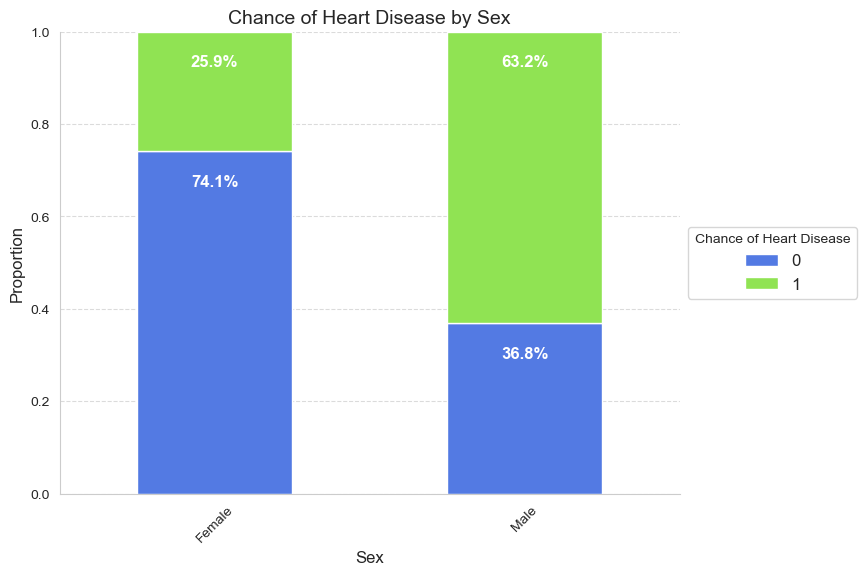

In [15]:
colors = ["#537AE3", "#90E353"]
cross_tab = pd.crosstab(df['Sex'], df['HeartDisease'], normalize='index')
ax = cross_tab.plot(kind='bar', stacked=True, color=colors, figsize=(8,6))
ax.set_xlabel('Sex', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.set_title('Chance of Heart Disease by Sex', fontsize=14)
ax.legend(title='Chance of Heart Disease', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.xticks(rotation=45)
plt.xticks([0, 1], ["Female", "Male"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 1)
for i in range(len(cross_tab)):
    for j in range(len(cross_tab.columns)):
        plt.text(i, cross_tab.iloc[i, :j+1].sum() - 0.05, str(round(cross_tab.iloc[i, j]*100,1)) + '%', ha='center', va='top', fontsize=12, fontweight='bold', color='white')
plt.show()

In [16]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

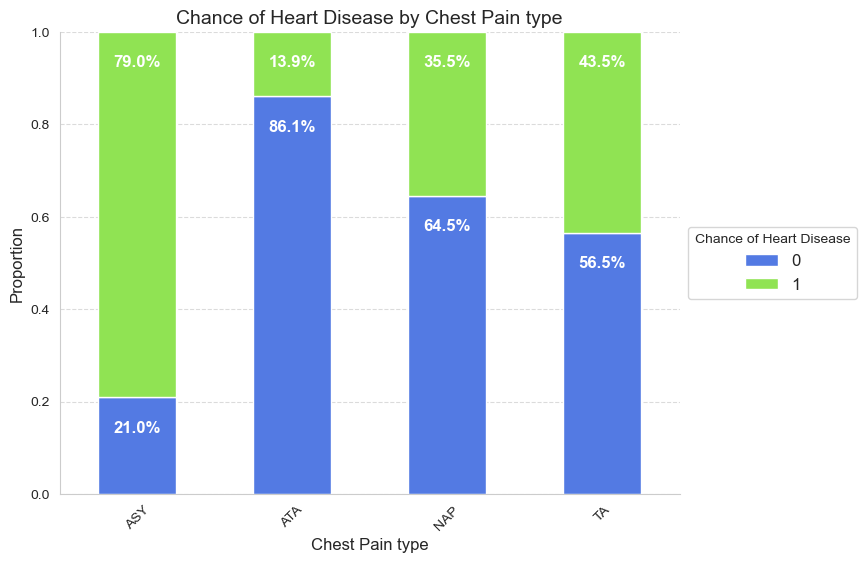

In [17]:
colors = ["#537AE3", "#90E353"]
cross_tab = pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize='index')
ax = cross_tab.plot(kind='bar', stacked=True, color=colors, figsize=(8,6))
ax.set_xlabel('Chest Pain type', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.set_title('Chance of Heart Disease by Chest Pain type', fontsize=14)
ax.legend(title='Chance of Heart Disease', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.xticks(rotation=45)
plt.xticks([0, 1, 2, 3], ["ASY", "ATA", "NAP", "TA"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 1)
for i in range(len(cross_tab)):
    for j in range(len(cross_tab.columns)):
        plt.text(i, cross_tab.iloc[i, :j+1].sum() - 0.05, str(round(cross_tab.iloc[i, j]*100,1)) + '%', ha='center', va='top', fontsize=12, fontweight='bold', color='white')
plt.show()

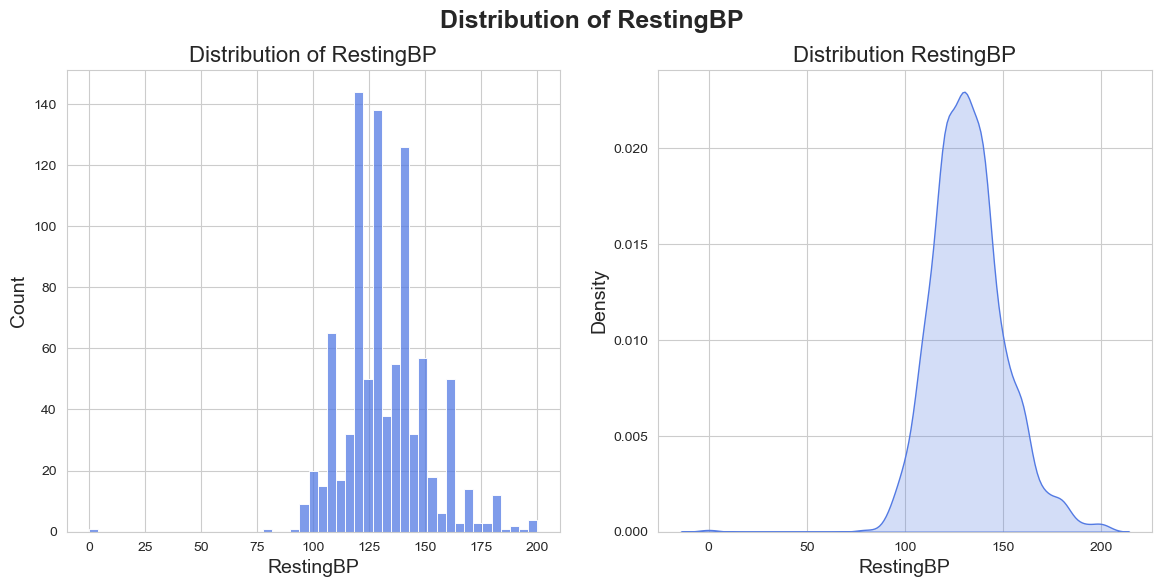

In [18]:
# Distribution of RestingBP

sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
sns.histplot(data=df, x='RestingBP', kde=False, ax=ax1, color='#537AE3')
ax1.set_xlabel('RestingBP', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Distribution of RestingBP', fontsize=16)
sns.kdeplot(data=df, x='RestingBP', fill=True, ax=ax2, color='#537AE3')
ax2.set_xlabel('RestingBP', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('Distribution RestingBP', fontsize=16)
fig.suptitle('Distribution of RestingBP', fontsize=18, fontweight='bold')
plt.show()

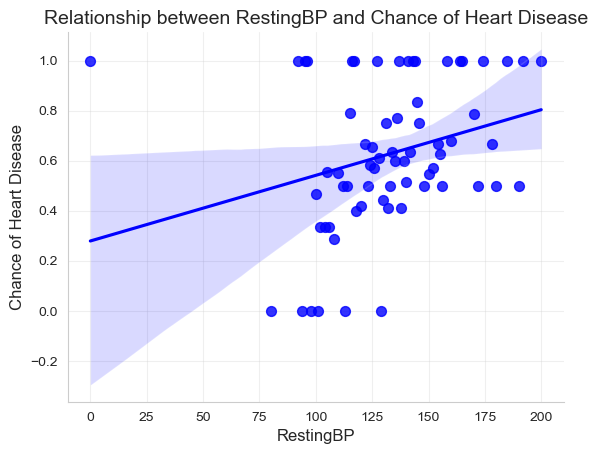

In [19]:
# Relationship between Age and Chance of Heart Disease

age_grouped = df.groupby('RestingBP')['HeartDisease'].mean()
sns.regplot(x=age_grouped.index, y=age_grouped, color='blue', scatter_kws={'s': 50})
sns.despine()
plt.xlabel('RestingBP', fontsize=12)
plt.ylabel('Chance of Heart Disease', fontsize=12)
plt.title('Relationship between RestingBP and Chance of Heart Disease', fontsize=14)
plt.grid(axis='both', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

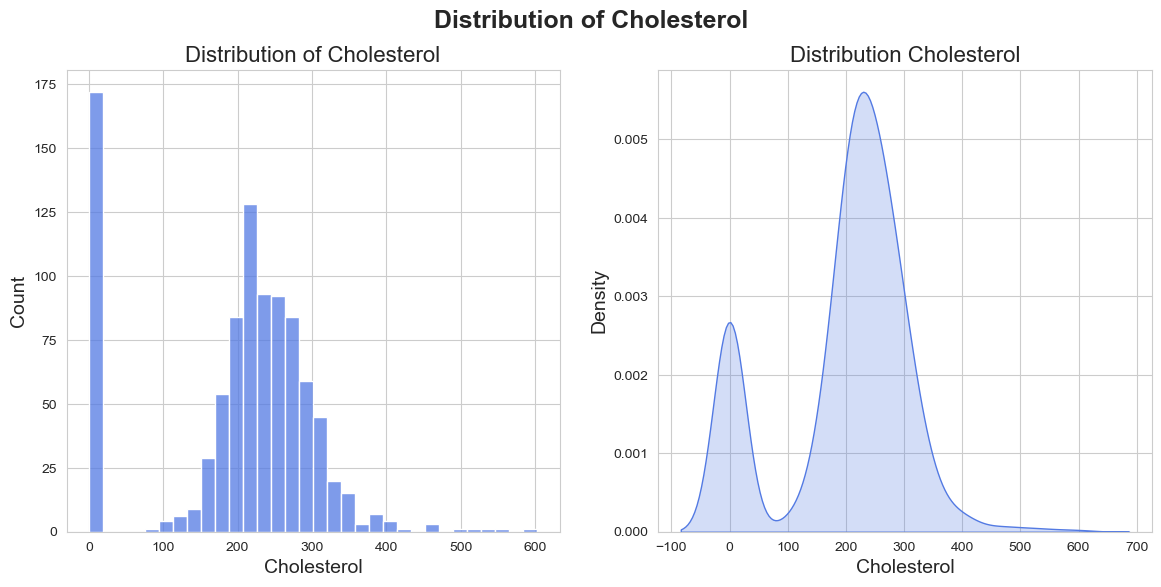

In [20]:
# Distribution of Cholesterol

sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
sns.histplot(data=df, x='Cholesterol', kde=False, ax=ax1, color='#537AE3')
ax1.set_xlabel('Cholesterol', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Distribution of Cholesterol', fontsize=16)
sns.kdeplot(data=df, x='Cholesterol', fill=True, ax=ax2, color='#537AE3')
ax2.set_xlabel('Cholesterol', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('Distribution Cholesterol', fontsize=16)
fig.suptitle('Distribution of Cholesterol', fontsize=18, fontweight='bold')
plt.show()

Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


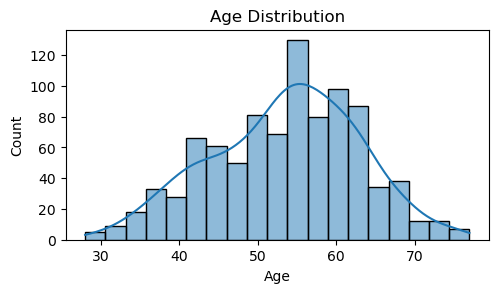

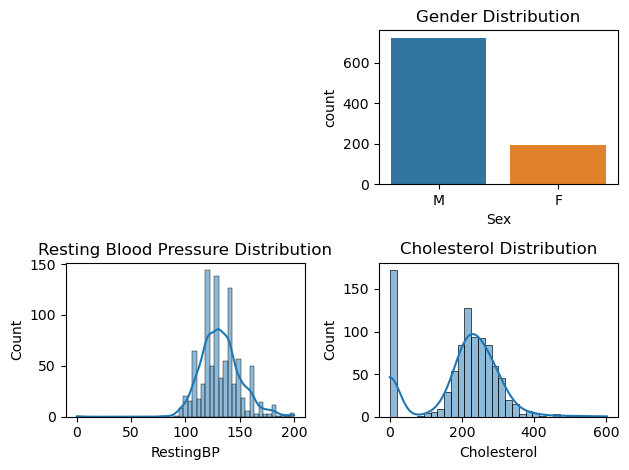

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Visualize data distributions
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution")

# Display the plot
plt.show()
plt.subplot(2, 2, 2)
sns.countplot(data=data, x='Sex')
plt.title("Gender Distribution")

plt.subplot(2, 2, 3)
sns.histplot(data['RestingBP'], kde=True)
plt.title("Resting Blood Pressure Distribution")

plt.subplot(2, 2, 4)
sns.histplot(data['Cholesterol'], kde=True)
plt.title("Cholesterol Distribution")

plt.tight_layout()
plt.show()

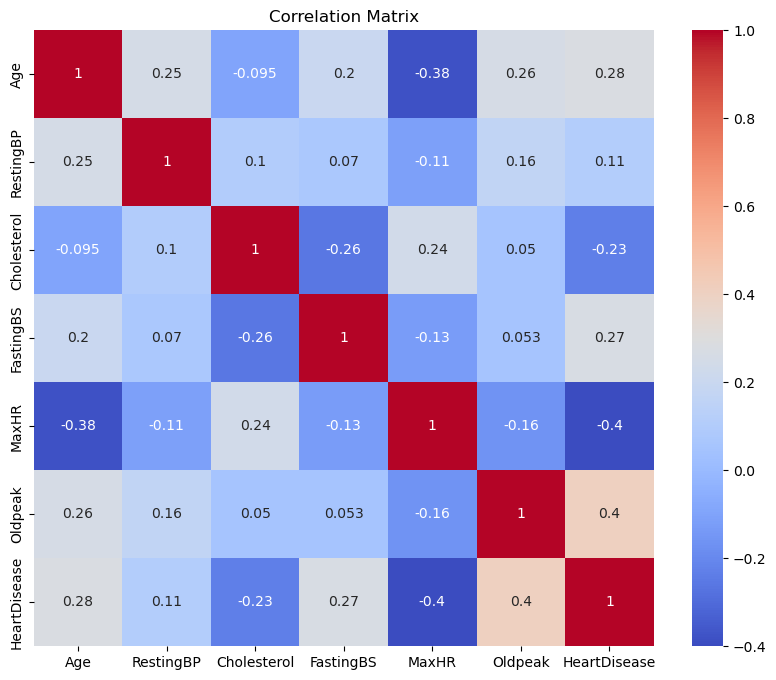

In [8]:
# CORRELATION MATRIX
# Create a DataFrame containing only the continuous variables
continuous_data = data.select_dtypes(include=['int64', 'float64'])
# Compute the correlation matrix for the continuous variables
correlation_matrix = continuous_data.corr()
# Create a figure with subplots
fig, ax = plt.subplots(figsize=(10, 8))
# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
# Set the title
ax.set_title("Correlation Matrix")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Feature Engineering
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Train-Test Split
X = data.drop(columns=['HeartDisease'])  # Features
y = data['HeartDisease']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (734, 20)
X_test shape: (184, 20)
y_train shape: (734,)
y_test shape: (184,)


In [8]:


# Assume X_train, y_train, X_test, y_test are available as NumPy arrays
X_train = np.random.rand(100, 1)  # Example data, replace with actual data
y_train = 2 * X_train + 3 + np.random.randn(100, 1) * 0.1  # Example labels, replace with actual labels
X_test = np.random.rand(20, 1)  # Example data, replace with actual data
y_test = 2 * X_test + 3 + np.random.randn(20, 1) * 0.1  # Example labels, replace with actual labels

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.009265404665556448
R-squared: 0.9752757345097739


Mean Squared Error: 0.015769102042718853
R-squared: 0.9448274411429277


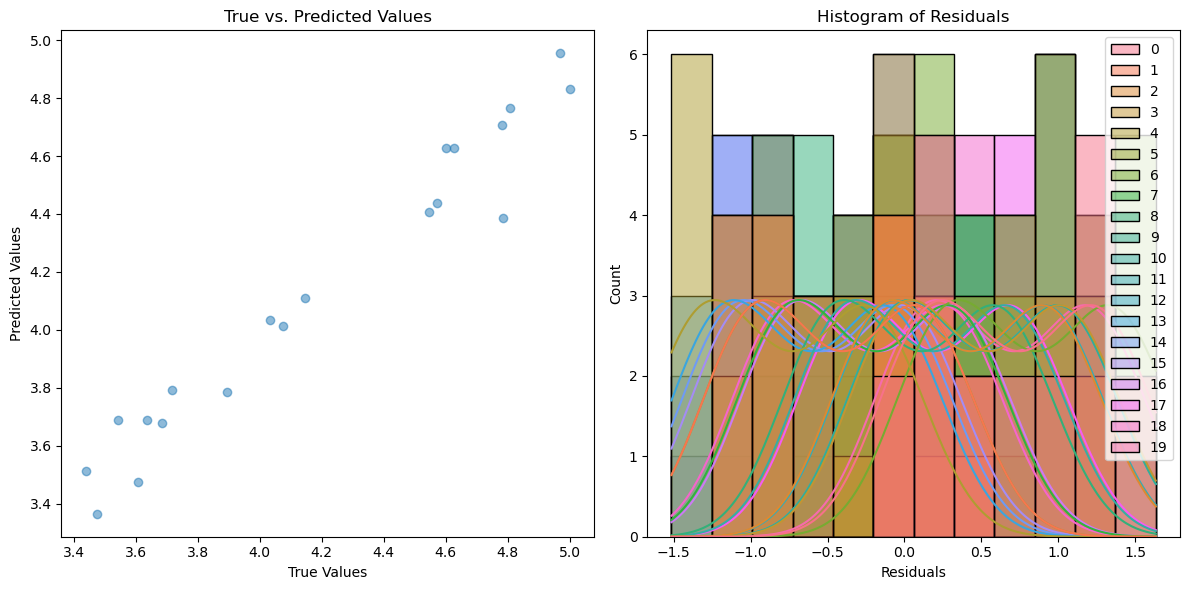

In [2]:

def analyze_random_forest(X_train, y_train, X_test, y_test):
    # Initialize and train the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train.ravel())

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Plot predictions vs. true values
    plt.figure(figsize=(12, 6))

    # Scatter plot of true vs. predicted values
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs. Predicted Values')

    # Residual plot
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Histogram of Residuals')

    plt.tight_layout()
    plt.show()

# Example usage with your dataset
# X_train, y_train, X_test, y_test should be defined as numpy arrays or pandas DataFrames
X_train = np.random.rand(100, 1)  # Replace with actual data
y_train = 2 * X_train + 3 + np.random.randn(100, 1) * 0.1  # Replace with actual labels
X_test = np.random.rand(20, 1)  # Replace with actual data
y_test = 2 * X_test + 3 + np.random.randn(20, 1) * 0.1  # Replace with actual labels

analyze_random_forest(X_train, y_train, X_test, y_test)


Mean Squared Error: 0.02055948893848657
R-squared: 0.9395016201549685


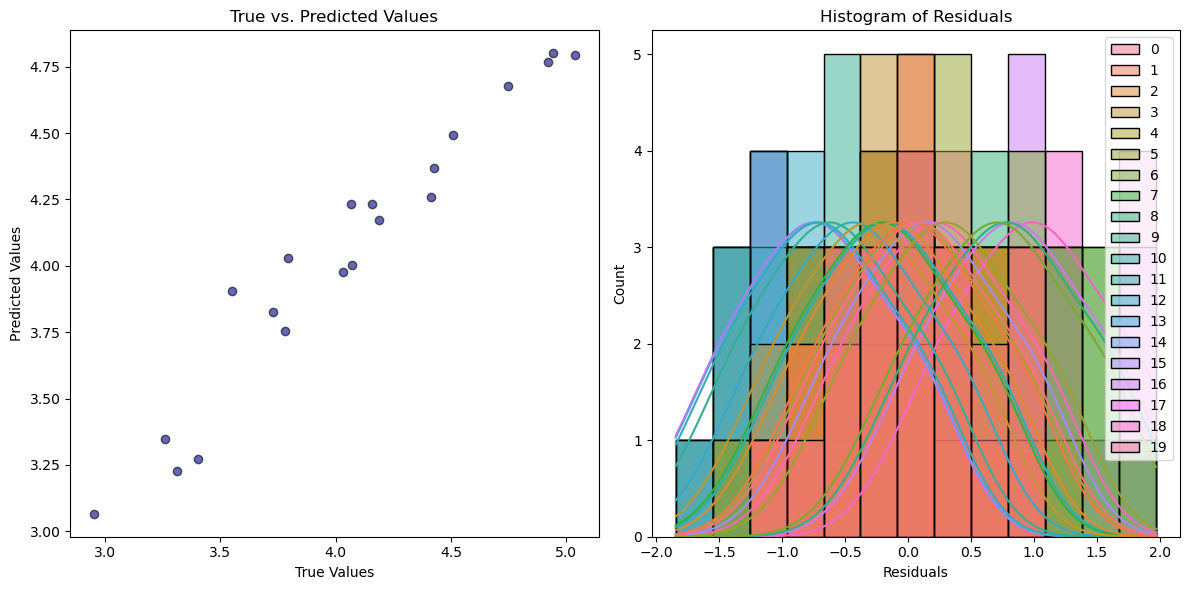

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_knn(X_train, y_train, X_test, y_test, n_neighbors=5):
    # Initialize and train the KNN Regressor
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train.ravel())

    # Predict on the test set
    y_pred = knn_model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Plot predictions vs. true values
    plt.figure(figsize=(12, 6))

    # Scatter plot of true vs. predicted values
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.6, c='darkblue', edgecolor='black')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs. Predicted Values')

    # Residual plot
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True, color='darkred')
    plt.xlabel('Residuals')
    plt.title('Histogram of Residuals')

    plt.tight_layout()
    plt.show()

# Example usage with your dataset
# X_train, y_train, X_test, y_test should be defined as numpy arrays or pandas DataFrames
X_train = np.random.rand(100, 1)  # Replace with actual data
y_train = 2 * X_train + 3 + np.random.randn(100, 1) * 0.1  # Replace with actual labels
X_test = np.random.rand(20, 1)  # Replace with actual data
y_test = 2 * X_test + 3 + np.random.randn(20, 1) * 0.1  # Replace with actual labels

analyze_knn(X_train, y_train, X_test, y_test, n_neighbors=5)
